In [109]:
import numpy as np
import pandas as pd
from itertools import combinations
# A naive search method which you need to improve
from difflib import SequenceMatcher

The problem is to match the user's free-form input against a pre-determined list of banks. For example, user input 'bawag bank' should be matched to 'BAWAG Group AG'.

In [110]:
# List of banks to compare
banks =   ['Sberbank Europe AG',
          'BAWAG Group AG',
          'Raiffeisenbankengruppe OÖ Verbund eGen',
          'Raiffeisen Bank International AG',
          'Volksbanken Verbund',
          'Erste Group Bank AG',
          'KBC Groep',
          'Investeringsmaatschappij Argenta',
          'Belfius Bank',
          'AXA Bank Belgium',
          'The Bank of New York Mellon SA/NV',
          'First Investment Bank AD',
          'RCB Bank Ltd',
          'Bank of Cyprus Holdings Public Limited Company',
          'Hellenic Bank Public Company Limited',
          'DekaBank Deutsche Girozentrale',
          'Erwerbsgesellschaft der S-Finanzgruppe mbH & Co. KG',
          'UBS Europe SE',
          'DEUTSCHE APOTHEKER- UND ÄRZTEBANK EG',
          'Volkswagen Bank Gesellschaft mit beschränkter Haftung',
          'Münchener Hypothekenbank eG',
          'DZ BANK AG Deutsche Zentral-Genossenschaftsbank, Frankfurt am Main',
          'HASPA Finanzholding',
          'State Street Europe Holdings Germany S.a.r.l. & Co. KG',
          'J.P. Morgan AG',
          'DEUTSCHE BANK AKTIENGESELLSCHAFT',
          'COMMERZBANK Aktiengesellschaft',
          'Landesbank Baden-Württemberg',
          'Landesbank Hessen-Thüringen Girozentrale',
          'Norddeutsche Landesbank - Girozentrale -',
          'Deutsche Pfandbriefbank AG',
          'Aareal Bank AG',
          'Hamburg Commercial Bank AG',
          'Bayerische Landesbank',
          'Jyske Bank A/S',
          'Sydbank A/S',
          'Nykredit Realkredit A/S',
          'Danske Bank A/S',
          'Luminor Holding AS',
          'Abanca Corporacion Bancaria S.A.',
          'Banco Santander S.A.',
          'Ibercaja Banco S.A.',
          'Kutxabank S.A',
          'Unicaja Banco S.A.',
          'CaixaBank S.A.',
          'Banco de Crédito Social Cooperativo',
          'Banco Bilbao Vizcaya Argentaria S.A.',
          'Banco de Sabadell S.A.',
          'Bankinter S.A.',
          'Kuntarahoitus Oyj',
          'Nordea Bank Abp',
          'OP Osuuskunta',
          'SFIL',
          'RCI Banque',
          'Confédération Nationale du Crédit Mutuel',
          'La Banque Postale',
          'Bpifrance',
          "C.R.H. - Caisse de refinancement de l'habitat",
          'HSBC Continental Europe',
          'Groupe BPCE',
          'Groupe Crédit Agricole',
          'Société générale',
          'BNP Paribas',
          'ALPHA SERVICES AND HOLDINGS S.A.',
          'National Bank of Greece S.A.',
          'Eurobank Ergasias Services and Holdings S.A.',
          'Piraeus Financial Holdings',
          'OTP-csoport',
          'Magyar Bankholding',
          'Barclays Bank Ireland plc',
          'Citibank Holdings Ireland Limited',
          'AIB Group plc',
          'Bank of Ireland Group plc',
          'Ulster Bank Ireland Designated Activity Company',
          'Bank of America Europe Designated Activity Company',
          'Íslandsbanki hf.',
          'Landsbankinn hf.',
          'Arion banki hf',
          'Intesa Sanpaolo S.p.A.',
          'Gruppo Bancario Finecobank  ',
          'UniCredit S.p.A.',
          'Gruppo Bancario Mediolanum  ',
          'Credito Emiliano Holding S.p.A.',
          'Banco BPM SpA',
          'Banca Popolare di Sondrio, Società Cooperativa per Azioni',
          'Banca Monte dei Paschi di Siena S.p.A.',
          'CASSA CENTRALE BANCA',
          'ICCREA BANCA S.P.A.',
          'Mediobanca - Banca di Credito Finanziario S.p.A.',
          'Akcine bendrove Šiauliu bankas',
          'Precision Capital S.A.',
          'RBC Investor Services Bank S.A.',
          'J.P. Morgan Bank Luxembourg S.A.',
          'Banque Internationale à Luxembourg',
          'Banque et Caisse d´Epargne de l´Etat, Luxembourg',
          'Akciju sabiedriba "Citadele banka"',
          'MDB Group Limited',
          'Bank of Valletta Plc',
          'HSBC Bank Malta p.l.c.',
          'BNG Bank N.V.',
          'ING Groep N.V.',
          'LP Group B.V.',
          'de Volksbank N.V.',
          'ABN AMRO Bank N.V.',
          'Coöperatieve Rabobank U.A.',
          'Nederlandse Waterschapsbank N.V.',
          'Bank Polska Kasa Opieki S.A.',
          'Powszechna Kasa Oszczednosci Bank Polski S.A.',
          'LSF Nani Investments S.à r.l.',
          'Banco Comercial Português SA',
          'Caixa Geral de Depósitos SA',
          'Banca Transilvania',
          'Länförsäkringar Bank AB (publ)',
          'Kommuninvest - group',
          'Skandinaviska Enskilda Banken - group',
          'SBAB Bank AB - group',
          'Swedbank - group',
          'Svenska Handelsbanken - group',
          'Biser Topco S.à r.l.',
          'Nova Ljubljanska Banka d.d. Ljubljana']

In [172]:
# Examples of search strings
s1 = 'Raiffaisen bank' # other options: 'Bawag bank', 'Erste', 'Raiffaisen bank'


In [173]:
res = []
for token in banks:
    res.append([s1, token, SequenceMatcher(lambda x: x==" ", s1.lower(), token.lower()).ratio()])

df2 = pd.DataFrame(res, columns=['Bank 1', 'Bank 2', 'Score'])
# The outcome is not great, for this search query 'BAWAG Group AG' should have highest similarity
df2.sort_values(by=['Score'], ascending=[False]).head()

,Bank 1,Bank 2,Score
3,Raiffaisen bank,Raiffeisen Bank International AG,0.595745
77,Raiffaisen bank,Arion banki hf,0.551724
37,Raiffaisen bank,Danske Bank A/S,0.533333
8,Raiffaisen bank,Belfius Bank,0.518519
11,Raiffaisen bank,First Investment Bank AD,0.512821


In [174]:
#The desired combination has a low score
idx = df2['Bank 2'].isin(['BAWAG Group AG'])

df2[idx].sort_values(by=['Score'], ascending=[False]).head()

,Bank 1,Bank 2,Score
1,Raiffaisen bank,BAWAG Group AG,0.137931


# QUESTION # 2(A)

In [64]:
#!pip install snscrape

In [ ]:
#(Khushi OR Gussa)
#lockdown

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

tweets_list2 = []
keywords = "(Khushi OR Gussa) since:2019-01-01 until:2022-01-31"
j=0
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keywords).get_items()):
    if j==500:
        break
    if not('@' in tweet.rawContent) and tweet.lang in ['hi','ur'] and not('http' in tweet.rawContent) and not('#' in tweet.rawContent):
             tweets_list2.append([tweet.rawContent])
             j+=1
    

tweets_df2 = pd.DataFrame(tweets_list2, columns=['Text'])
tweets_df2.head(10)

In [10]:
tweets_df2.shape

(500, 1)

In [11]:
tweets_df2.to_csv("E:MSDS/MS-2/NLP/sentiment.csv",index=False)

In [32]:
import pandas as pd
df = pd.read_csv("E:MSDS/MS-2/NLP/sentiment.csv")
df.head()

,Text
0,Thanks nahin bolti bhi toh bhi faraq aur gussa...
1,Ab to khushi ka gum hai na gum ki khushi mujhe...
2,Gauahar aap every year bigg mai jaati hai aur...
3,Ab herat se hoti jub mili koi moqa khushi ka\n...
4,Yehi thumkay ghalti se koi khatoon laga le khu...


In [33]:
import re
corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou','\n',',','.','?']
for i in range(0,500):
    doc = re.sub('[^a-zA-z]',' ',df.iloc[:,0].values[i])
    doc = doc.lower() 
    doc = doc.split()
    doc = [word for word in doc if not word in stopwords]
    doc =' '.join(doc)
    if doc is not None:
        corpus.append(doc)
len(corpus)  

500

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
cv=TfidfVectorizer()
X=cv.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5, random_state=42,n_init="auto").fit(X)

In [37]:
#!pip install threadpoolctl==3.1.0

In [48]:
(kmeans.labels_)

array([2, 3, 0, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 1, 2, 4, 3, 2, 3, 2,
       4, 3, 3, 3, 2, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2,
       4, 3, 0, 3, 3, 2, 3, 2, 2, 3, 3, 0, 3, 3, 2, 2, 3, 0, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 2, 2,
       3, 2, 3, 2, 3, 3, 2, 0, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 0,
       1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2,
       2, 2, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 4, 3,
       0, 3, 1, 1, 3, 1, 4, 3, 1, 3, 1, 2, 3, 0, 3, 3, 2, 2, 2, 3, 3, 3,
       3, 2, 3, 0, 4, 2, 1, 4, 2, 3, 1, 1, 4, 2, 3, 0, 2, 3, 2, 2, 4, 3,
       4, 1, 2, 2, 2, 3, 3, 3, 3, 4, 3, 1, 0, 4, 4, 4, 3, 3, 2, 3, 3, 4,
       1, 3, 0, 1, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 3, 1, 4, 1, 3, 1,
       3, 2, 0, 0, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1,

In [39]:
len(kmeans.labels_)

500

In [42]:
df['C_Text']=corpus
df['label']=kmeans.labels_
df.head()

,Text,C_Text,label
0,Thanks nahin bolti bhi toh bhi faraq aur gussa...,thanks nahin bolti toh faraq gussa parta bola ...,2
1,Ab to khushi ka gum hai na gum ki khushi mujhe...,khushi gum gum khushi mujhe behis bana chuki b...,3
2,Gauahar aap every year bigg mai jaati hai aur...,gauahar aap every year bigg mai jaati aap bigg...,0
3,Ab herat se hoti jub mili koi moqa khushi ka\n...,herat hoti jub mili moqa khushi ye zalim zaman...,3
4,Yehi thumkay ghalti se koi khatoon laga le khu...,thumkay ghalti khatoon laga khushi mein bas,2


In [43]:
df.C_Text.iloc[3]

'herat hoti jub mili moqa khushi ye zalim zamana kia samjhe ghum khud pai beta bhol he pawn manzar e mayat ankho dekha'

In [44]:
df.Text.iloc[3]

'Ab herat se hoti jub mili koi moqa khushi ka\nYe zalim zamana Kia samjhe ga ghum wo jo khud pai na beta\nBhol he na pawn manzar e mayat jo ankho nai dekha 😔💔🔥'

In [ ]:
df.to_csv("E:MSDS/MS-2/NLP/c_sentiment.csv",index=False)

In [120]:
import pandas as pd
import seaborn as sns


In [121]:
df = pd.read_csv("E:MSDS/MS-2/NLP/c_sentiment.csv")
df.head()


,Text,C_Text,label
0,Thanks nahin bolti bhi toh bhi faraq aur gussa...,thanks nahin bolti toh faraq gussa parta bola ...,2
1,Ab to khushi ka gum hai na gum ki khushi mujhe...,khushi gum gum khushi mujhe behis bana chuki b...,3
2,Gauahar aap every year bigg mai jaati hai aur...,gauahar aap every year bigg mai jaati aap bigg...,0
3,Ab herat se hoti jub mili koi moqa khushi ka\n...,herat hoti jub mili moqa khushi ye zalim zaman...,3
4,Yehi thumkay ghalti se koi khatoon laga le khu...,thumkay ghalti khatoon laga khushi mein bas,2


In [122]:
df.shape

(500, 3)

In [123]:
df.isna().sum()

Text      0
C_Text    3
label     0
dtype: int64

In [124]:
df.dropna(axis=0,inplace=True)

In [125]:
df.shape

(497, 3)

In [126]:
df=df.sample(497)

In [127]:
df.label.value_counts()

3    231
2    105
1     77
4     53
0     31
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

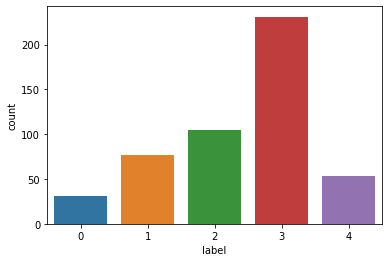

In [128]:
sns.countplot(x='label',data=df)

In [191]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC

In [130]:
ngram = CountVectorizer(ngram_range=(1,3))
raw = CountVectorizer()
tf = TfidfVectorizer()

In [131]:
X_raw = raw.fit_transform(df.C_Text).toarray()
X_ngram = ngram.fit_transform(df.C_Text).toarray()
X_tf = tf.fit_transform(df.C_Text).toarray()

In [132]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [133]:
X_raw,y_raw=SMOTE().fit_resample(X_raw, df.label)

In [134]:
print(sorted(Counter(y_raw).items()))

[(0, 231), (1, 231), (2, 231), (3, 231), (4, 231)]


In [135]:
X_ngram,y_ngram=SMOTE().fit_resample(X_ngram, df.label)
X_tf,y_tf=SMOTE().fit_resample(X_tf, df.label)

<AxesSubplot:xlabel='label', ylabel='count'>

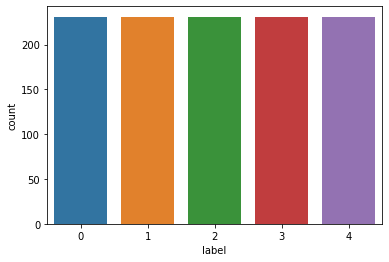

In [136]:
sns.countplot(x=y_tf)

In [137]:
X_trainRaw, X_testRaw, y_trainRaw, y_testRaw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_trainNGRAM, X_testNGRAM, y_trainNGRAM, y_testNGRAM = train_test_split(X_ngram, y_ngram, test_size=0.2, random_state=42)
X_trainTF, X_testTF, y_trainTF, y_testTF = train_test_split(X_tf, y_tf, test_size=0.2, random_state=42)

In [181]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('Perceptron',Perceptron(tol=1e-3, random_state=42)))
models.append(('RandomForest',RandomForestClassifier(random_state=42)))
models.append(('NB',MultinomialNB()))
models.append(('SVM',SVC()))

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
def fetch_reports(X_train,X_test,y_train,y_test,bow):
    print(f'Reprot for Bag of words {bow}')
    for name,model in models:
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        print(f'Report of Model {name}')
        print(classification_report(y_test,pred,zero_division=1,labels=[0,1, 2, 3, 4]))
        print(f"Micro AVG:{precision_score(y_test, pred, average='micro')}")
        print(f"Macro AVG:{precision_score(y_test, pred, average='macro')}")
        confusion=confusion_matrix(y_test,pred)
        sns.heatmap(confusion,annot=True,xticklabels=['very -ve','-ve','neutral','+ve','very +ve'],
                   yticklabels=['very -ve','-ve','neutral','+ve','very +ve']
                   )
        plt.show()
        print('<------------------------------------------------------------->')

Reprot for Bag of words Raw
Report of Model LogisticRegression
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        49
           1       0.96      0.98      0.97        52
           2       0.96      0.87      0.91        52
           3       0.85      0.68      0.76        41
           4       1.00      1.00      1.00        37

    accuracy                           0.89       231
   macro avg       0.90      0.89      0.89       231
weighted avg       0.90      0.89      0.89       231

Micro AVG:0.8874458874458875
Macro AVG:0.8979014566697439


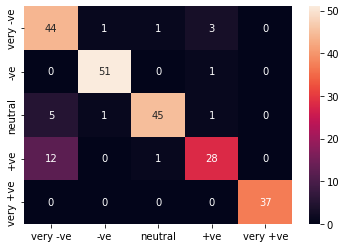

<------------------------------------------------------------->
Report of Model Perceptron
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        49
           1       0.96      0.98      0.97        52
           2       0.82      0.96      0.88        52
           3       0.90      0.63      0.74        41
           4       1.00      1.00      1.00        37

    accuracy                           0.89       231
   macro avg       0.90      0.89      0.89       231
weighted avg       0.90      0.89      0.89       231

Micro AVG:0.8917748917748918
Macro AVG:0.9004034835987149


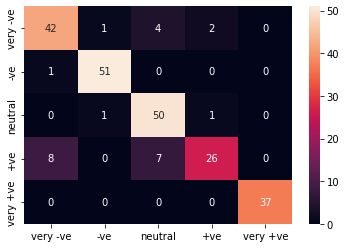

<------------------------------------------------------------->
Report of Model RandomForest
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        49
           1       0.96      0.98      0.97        52
           2       0.93      0.96      0.94        52
           3       0.88      0.51      0.65        41
           4       1.00      1.00      1.00        37

    accuracy                           0.88       231
   macro avg       0.89      0.87      0.87       231
weighted avg       0.89      0.88      0.87       231

Micro AVG:0.8787878787878788
Macro AVG:0.8923205550564042


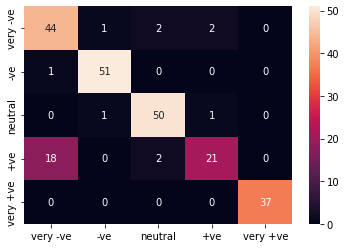

<------------------------------------------------------------->
Report of Model NB
              precision    recall  f1-score   support

           0       0.68      0.55      0.61        49
           1       0.85      0.98      0.91        52
           2       0.89      0.60      0.71        52
           3       0.80      0.59      0.68        41
           4       0.56      1.00      0.72        37

    accuracy                           0.74       231
   macro avg       0.75      0.74      0.72       231
weighted avg       0.77      0.74      0.73       231

Micro AVG:0.7359307359307359
Macro AVG:0.7542640692640692


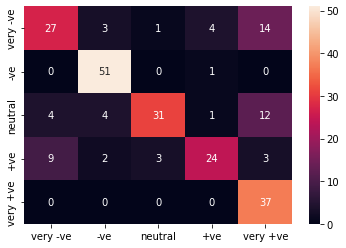

<------------------------------------------------------------->
Report of Model SVM
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        49
           1       0.98      0.92      0.95        52
           2       0.89      0.65      0.76        52
           3       0.56      0.80      0.66        41
           4       1.00      0.86      0.93        37

    accuracy                           0.81       231
   macro avg       0.84      0.81      0.82       231
weighted avg       0.84      0.81      0.82       231

Micro AVG:0.8095238095238095
Macro AVG:0.8376735387740675


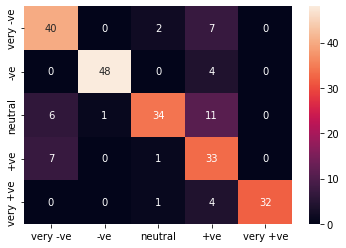

<------------------------------------------------------------->


In [200]:
fetch_reports(X_trainRaw,X_testRaw,y_trainRaw,y_testRaw,'Raw')

Reprot for Bag of words NGRAM
Report of Model LogisticRegression
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        49
           1       0.96      0.98      0.97        52
           2       1.00      0.79      0.88        52
           3       0.84      0.63      0.72        41
           4       1.00      1.00      1.00        37

    accuracy                           0.87       231
   macro avg       0.89      0.86      0.87       231
weighted avg       0.89      0.87      0.87       231

Micro AVG:0.8658008658008658
Macro AVG:0.8906295482812459


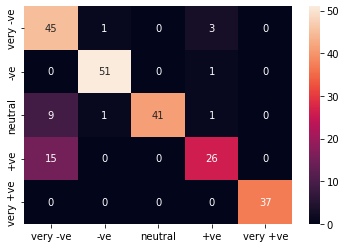

<------------------------------------------------------------->
Report of Model Perceptron
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        49
           1       0.96      0.98      0.97        52
           2       0.93      0.83      0.88        52
           3       0.83      0.71      0.76        41
           4       1.00      1.00      1.00        37

    accuracy                           0.89       231
   macro avg       0.90      0.89      0.89       231
weighted avg       0.89      0.89      0.89       231

Micro AVG:0.8874458874458875
Macro AVG:0.8951236376420955


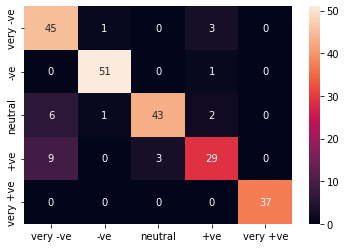

<------------------------------------------------------------->
Report of Model RandomForest
              precision    recall  f1-score   support

           0       0.59      0.94      0.72        49
           1       0.96      0.98      0.97        52
           2       0.98      0.79      0.87        52
           3       0.81      0.41      0.55        41
           4       1.00      1.00      1.00        37

    accuracy                           0.83       231
   macro avg       0.87      0.82      0.82       231
weighted avg       0.87      0.83      0.83       231

Micro AVG:0.8311688311688312
Macro AVG:0.8675444052802543


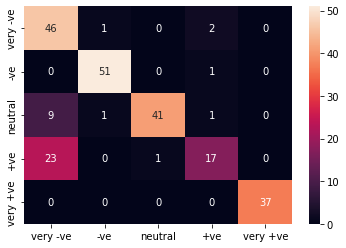

<------------------------------------------------------------->
Report of Model NB
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        49
           1       0.93      0.98      0.95        52
           2       0.97      0.60      0.74        52
           3       0.86      0.44      0.58        41
           4       0.50      1.00      0.67        37

    accuracy                           0.71       231
   macro avg       0.76      0.71      0.70       231
weighted avg       0.78      0.71      0.71       231

Micro AVG:0.70995670995671
Macro AVG:0.7608371985157699


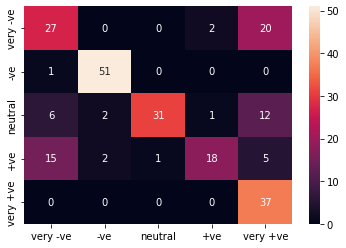

<------------------------------------------------------------->
Report of Model SVM
              precision    recall  f1-score   support

           0       0.72      0.86      0.79        49
           1       1.00      0.83      0.91        52
           2       1.00      0.52      0.68        52
           3       0.48      0.85      0.61        41
           4       1.00      0.81      0.90        37

    accuracy                           0.77       231
   macro avg       0.84      0.77      0.78       231
weighted avg       0.85      0.77      0.78       231

Micro AVG:0.7662337662337663
Macro AVG:0.8407179971658006


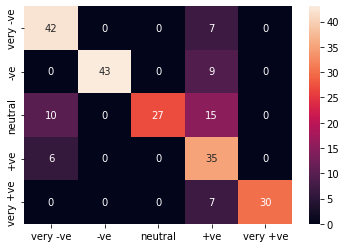

<------------------------------------------------------------->


In [201]:
fetch_reports(X_trainNGRAM,X_testNGRAM,y_trainNGRAM,y_testNGRAM,'NGRAM')

Reprot for Bag of words TFIDF
Report of Model LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        52
           2       1.00      0.90      0.95        52
           3       0.89      1.00      0.94        41
           4       1.00      1.00      1.00        37

    accuracy                           0.98       231
   macro avg       0.98      0.98      0.98       231
weighted avg       0.98      0.98      0.98       231

Micro AVG:0.9783549783549783
Macro AVG:0.9782608695652174


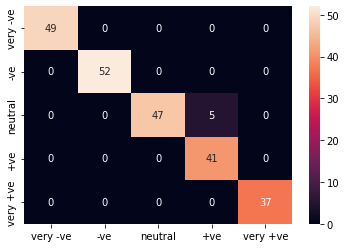

<------------------------------------------------------------->
Report of Model Perceptron
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.96      0.98        52
           2       0.81      1.00      0.90        52
           3       1.00      0.76      0.86        41
           4       1.00      0.97      0.99        37

    accuracy                           0.94       231
   macro avg       0.96      0.94      0.94       231
weighted avg       0.95      0.94      0.94       231

Micro AVG:0.9437229437229437
Macro AVG:0.9585000000000001


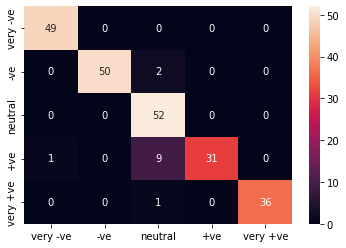

<------------------------------------------------------------->
Report of Model RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.98      1.00      0.99        52
           2       0.98      0.90      0.94        52
           3       0.91      0.98      0.94        41
           4       1.00      1.00      1.00        37

    accuracy                           0.97       231
   macro avg       0.97      0.98      0.97       231
weighted avg       0.97      0.97      0.97       231

Micro AVG:0.974025974025974
Macro AVG:0.9738779302458548


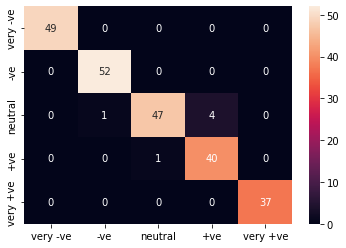

<------------------------------------------------------------->
Report of Model NB
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        49
           1       0.91      1.00      0.95        52
           2       0.91      0.81      0.86        52
           3       1.00      0.59      0.74        41
           4       0.76      1.00      0.86        37

    accuracy                           0.88       231
   macro avg       0.89      0.88      0.87       231
weighted avg       0.90      0.88      0.88       231

Micro AVG:0.8831168831168831
Macro AVG:0.8942670623481346


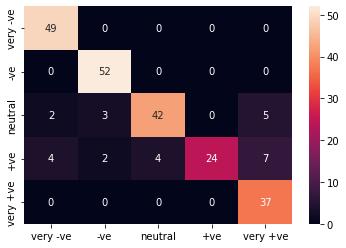

<------------------------------------------------------------->
Report of Model SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      0.94      0.97        52
           2       1.00      0.75      0.86        52
           3       0.69      1.00      0.82        41
           4       1.00      0.95      0.97        37

    accuracy                           0.92       231
   macro avg       0.94      0.93      0.92       231
weighted avg       0.95      0.92      0.92       231

Micro AVG:0.922077922077922
Macro AVG:0.9389830508474576


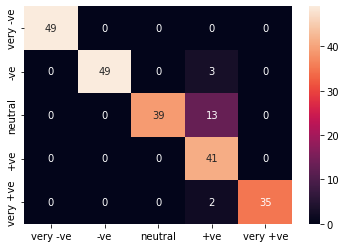

<------------------------------------------------------------->


In [202]:
fetch_reports(X_trainTF,X_testTF,y_trainTF,y_testTF,'TFIDF')